In [1]:
import pandas as pd               
import numpy as np          
import matplotlib.pyplot as plt 

# PSI projekt - metody płytkie

In [2]:
train = pd.read_csv('data/dane_poprawione.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47231 entries, 0 to 47230
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   com_type                47176 non-null  object 
 1   prod_size               47231 non-null  object 
 2   x                       47231 non-null  float64
 3   y                       47231 non-null  float64
 4   z                       47231 non-null  float64
 5   Construction            47231 non-null  float64
 6   Copper                  47231 non-null  float64
 7   Gold                    47231 non-null  float64
 8   Iron                    47231 non-null  float64
 9   Lead                    47231 non-null  float64
 10  Sand and Gravel         47231 non-null  float64
 11  Silver                  47231 non-null  float64
 12  Tungsten                47231 non-null  float64
 13  Uranium                 47231 non-null  float64
 14  Zinc                    47231 non-null

In [4]:
train

,com_type,prod_size,x,y,z,Construction,Copper,Gold,Iron,Lead,...,Dolomite,Gneiss,Granite,Gravel,Limestone,Quartzite,Sandstone,Schist,Shale,Other_hrock
0,M,N,0.424693,-0.384325,0.819713,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,M,N,0.416069,-0.383738,0.824398,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,M,N,0.409212,-0.381584,0.828818,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,M,N,0.416118,-0.383802,0.824343,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,N,0.424353,-0.382792,0.820607,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47226,M,L,0.720220,-0.369904,0.586902,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47227,B,L,0.739207,-0.346274,0.577640,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47228,M,L,0.733767,-0.351020,0.581697,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47229,M,N,0.761597,-0.351719,0.544301,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'prod_size'], train['prod_size'], random_state=123, test_size=0.20)

In [6]:
X_train.isna().sum()

com_type                  42
x                          0
y                          0
z                          0
Construction               0
Copper                     0
Gold                       0
Iron                       0
Lead                       0
Sand and Gravel            0
Silver                     0
Tungsten                   0
Uranium                    0
Zinc                       0
Other_com1                 0
x0_Leach                   0
x0_Placer                  0
x0_Processing Plant        0
x0_Surface                 0
x0_Surface-Underground     0
x0_Underground             0
x0_Unknown                 0
x0_Well                    0
x0_Occurrence              0
x0_Past Producer           0
x0_Plant                   0
x0_Producer                0
x0_Prospect                0
Chalcocite                 0
Chalcopyrite               0
Galena                     0
Hematite                   0
Magnetite                  0
Malachite                  0
Pyrite        

jak widać są missing data, więc trzeba będzie zrobić ich preprocessing

<Axes: >

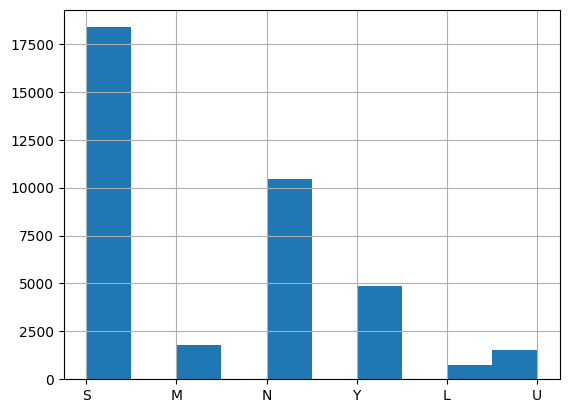

In [7]:
y_train.hist()

także są niezbalansowane klasy, więc trzeba będzie zrobić stratyfikację foldów

In [8]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [9]:
def test_model(model):
    return [accuracy_score(model.predict(X_train), y_train), accuracy_score(model.predict(X_test), y_test)]

In [10]:
values = []
labels = []

## Preprocessing

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
preprocessor = Pipeline(
    [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('ct', ColumnTransformer([('ohe', OneHotEncoder(sparse_output=False), [0])], remainder='passthrough')),
        ('scaler', StandardScaler())
    ])

## Regresja softmax

### wersja multinomial

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [16]:
pipe = Pipeline([('preprocessing', preprocessor), 
                 ('classifier', LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state=42, max_iter=10000))])
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]}
model = GridSearchCV(pipe, param_grid, cv=kfold, refit=True)

In [17]:
model.fit(X_train, y_train)
model.best_params_

{'classifier__C': 1}

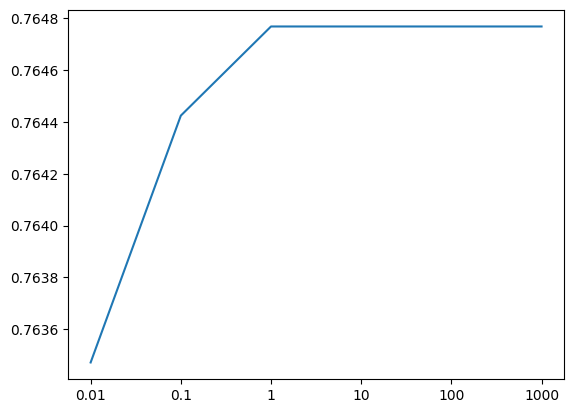

In [23]:
plt.plot(np.arange(len(model.cv_results_['mean_test_score'])), model.cv_results_['mean_test_score'])
plt.xticks(ticks=np.arange(len(model.cv_results_['mean_test_score'])), labels=param_grid['classifier__C']);

In [25]:
values.append(test_model(model))
labels.append('softmax, multi')

### wersja one-vs-all

In [26]:
pipe = Pipeline([('preprocessing', preprocessor), 
                 ('classifier', LogisticRegression(multi_class="ovr",solver="lbfgs", random_state=42, max_iter=10000))])
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]}
model = GridSearchCV(pipe, param_grid, cv=kfold, refit=True)

In [27]:
model.fit(X_train, y_train)
model.best_params_

{'classifier__C': 1}

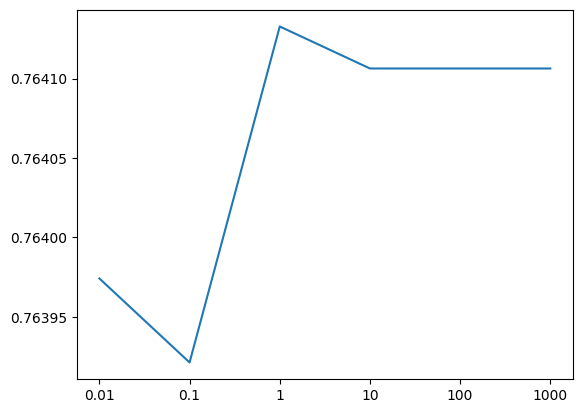

In [28]:
plt.plot(np.arange(len(model.cv_results_['mean_test_score'])), model.cv_results_['mean_test_score'])
plt.xticks(ticks=np.arange(len(model.cv_results_['mean_test_score'])), labels=param_grid['classifier__C']);

In [29]:
test_model(model)

[0.7651122168113487, 0.7623584206626443]

In [30]:
values.append(test_model(model))
labels.append('softmax, ovr')

### Ridge
według dokumentacji automatycznie obsługuje multiclass w wariancie one-vs-all

In [31]:
from sklearn.linear_model import RidgeClassifier

In [45]:
pipe = Pipeline([('preprocessing', preprocessor), 
                 ('classifier', RidgeClassifier(max_iter=10000))])
param_grid = {'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model = GridSearchCV(pipe, param_grid, cv=kfold, refit=True)

In [46]:
model.fit(X_train, y_train)
model.best_params_

{'classifier__alpha': 10}

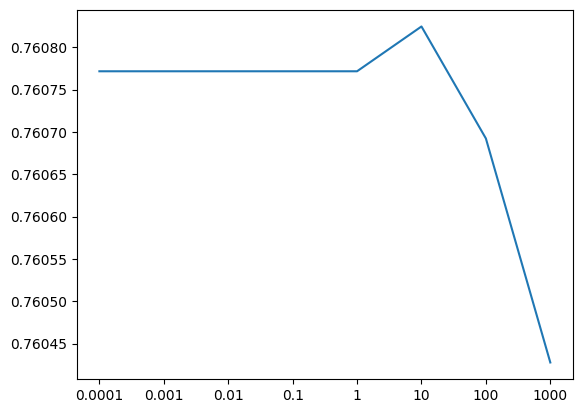

In [47]:
plt.plot(np.arange(len(model.cv_results_['mean_test_score'])), model.cv_results_['mean_test_score'])
plt.xticks(ticks=np.arange(len(model.cv_results_['mean_test_score'])), labels=param_grid['classifier__alpha']);

In [48]:
test_model(model)

[0.762280330298539, 0.7619350058219541]

In [50]:
values.append(test_model(model))
labels.append('ridge, ovr')

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
pipe = Pipeline([('preprocessing', preprocessor), 
                 ('classifier', RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42))])
param_grid = {
            'classifier__max_leaf_nodes': [512, 1024, 2048, 4096, 8192]
}
model = GridSearchCV(pipe, param_grid, cv=kfold, refit=True)

In [75]:
model.fit(X_train, y_train)
model.best_params_

{'classifier__max_leaf_nodes': 4096}

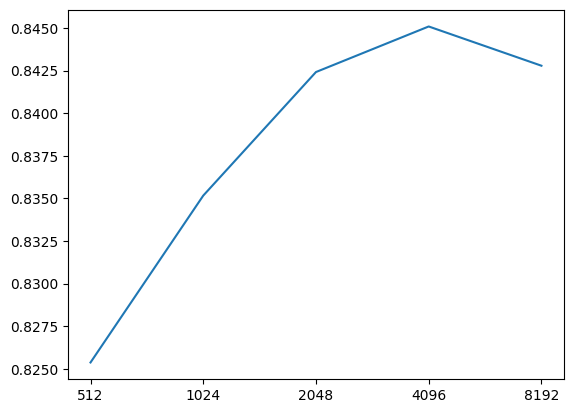

In [76]:
plt.plot(np.arange(len(model.cv_results_['mean_test_score'])), model.cv_results_['mean_test_score'])
plt.xticks(ticks=np.arange(len(model.cv_results_['mean_test_score'])), labels=param_grid['classifier__max_leaf_nodes']);

In [77]:
test_model(model)

[0.954239889900487, 0.8493701704244734]

In [78]:
values.append(test_model(model))
labels.append('random forest')

### XGBoost

In [79]:
from xgboost import XGBClassifier

Trzeba specjalnie przygotować dane do XGB

In [82]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
ord_enc = OrdinalEncoder()
y_train_ord = ord_enc.fit_transform(np.array(y_train).reshape(-1, 1)).flatten()
y_test_ord = ord_enc.fit_transform(np.array(y_test).reshape(-1, 1)).flatten()

In [96]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [129]:
pipe = Pipeline([('preprocessing', preprocessor), 
                 ('classifier', XGBClassifier(objective='multi:softmax', num_classes=6, n_estimators=10))])
param_grid = {
            'classifier__max_depth': [12, 15, 18, 20],
            'classifier__learning_rate':[0.1, 0.25, 0.5, 1.0]
}
model = GridSearchCV(pipe, param_grid, cv=kfold, refit=True)

In [130]:
model.fit(X_train, y_train_ord)

[00:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.

[00:14:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.

[00:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.

[00:14:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.

[00:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_classes" } are not us

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='most_frequent')),
                                                        ('ct',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('ohe',
                                                                                          OneHotEncoder(sparse_output=False),
                                                                                          [0])])),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('classifier',
                                        XGBClas...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=10,
                                                      n_jobs=None,
                                                      num_classes=6,
                                                      num_parallel_tree=None,
                                                      objective='multi:softmax', ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.25, 0.5, 1.0],
                         'classifier__max_depth': [12, 15, 18, 20]})

In [131]:
model.best_params_

{'classifier__learning_rate': 0.5, 'classifier__max_depth': 15}

In [132]:
[accuracy_score(model.predict(X_train), y_train_ord), accuracy_score(model.predict(X_test), y_test_ord)]

[0.9597713317806479, 0.851063829787234]

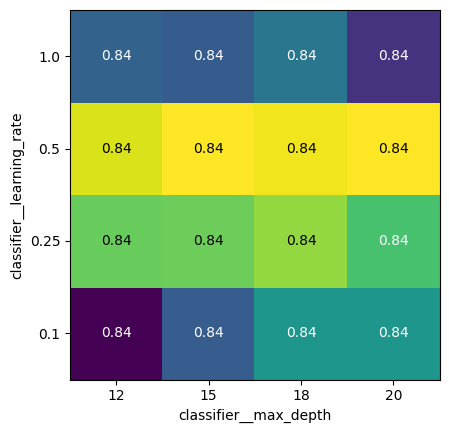

In [134]:
heatmap(model.cv_results_['mean_test_score'].reshape(4, 4), xlabel='classifier__max_depth', xticklabels=param_grid['classifier__max_depth'], 
        ylabel='classifier__learning_rate', yticklabels=param_grid['classifier__learning_rate'], cmap="viridis")


In [135]:
model.cv_results_['mean_test_score'].reshape(4, 4)

array([[0.83813243, 0.84009101, 0.84170544, 0.84167899],
       [0.84334631, 0.84339928, 0.84382278, 0.84294936],
       [0.84453733, 0.84490795, 0.84477559, 0.84490792],
       [0.84024979, 0.84009097, 0.84077917, 0.83911184]])

In [136]:
values.append([accuracy_score(model.predict(X_train), y_train_ord), accuracy_score(model.predict(X_test), y_test_ord)])

In [137]:
labels.append('xgb')

## Podsumowanie

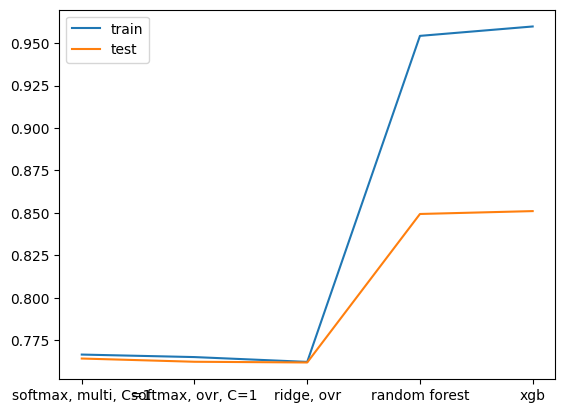

In [140]:
plt.plot(np.arange(len(values)), values)
plt.xticks(ticks=np.arange(len(values)), labels=labels);
plt.legend(['train', 'test'])